<center><h1><b>Ride Hailing Price Prediction</b></h1></center>

*Analyzed by: Dendi Apriyandi*


Dataset:
https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

# Data Preparation

# Identification of problems

## Problem Topics

Melakakukan prediksi perjalanan platform ride-hailing menggunakan dataset dari Kaggle

# Data Overview

| Nama Kolom                   | Penjelasan                                                                 |
|------------------------------|----------------------------------------------------------------------------|
| `id`                         | Identifikasi unik untuk setiap entri.                                      |
| `timestamp`                  | Waktu dalam bentuk float yang menunjukkan kapan data direkam.              |
| `hour`                       | Jam pada saat data direkam.                                                |
| `day`                        | Hari dalam bulan saat data direkam.                                        |
| `month`                      | Bulan saat data direkam.                                                   |
| `datetime`                   | Waktu dan tanggal lengkap saat data direkam dalam format objek.            |
| `timezone`                   | Zona waktu dari data yang direkam.                                         |
| `source`                     | Lokasi awal perjalanan.                                                    |
| `destination`                | Lokasi tujuan perjalanan.                                                  |
| `cab_type`                   | Jenis layanan taksi yang digunakan (misalnya Uber, Lyft).                  |
| `product_id`                 | Identifikasi unik untuk produk layanan taksi.                              |
| `name`                       | Nama dari produk layanan taksi.                                            |
| `price`                      | Harga perjalanan.                                                         |
| `distance`                   | Jarak perjalanan dalam satuan yang ditentukan (biasanya mil atau kilometer).|
| `surge_multiplier`           | Faktor pengali harga yang diterapkan selama permintaan tinggi.             |
| `latitude`                   | Garis lintang lokasi pengambilan.                                          |
| `longitude`                  | Garis bujur lokasi pengambilan.                                            |
| `temperature`                | Suhu pada saat data direkam.                                               |
| `apparentTemperature`        | Suhu terasa pada saat data direkam.                                        |
| `short_summary`              | Ringkasan singkat kondisi cuaca.                                           |
| `long_summary`               | Ringkasan panjang kondisi cuaca.                                           |
| `precipIntensity`            | Intensitas presipitasi pada saat data direkam.                             |
| `precipProbability`          | Kemungkinan terjadinya presipitasi pada saat data direkam.                 |
| `humidity`                   | Kelembaban pada saat data direkam.                                         |
| `windSpeed`                  | Kecepatan angin pada saat data direkam.                                    |
| `windGust`                   | Kecepatan angin tertinggi pada saat data direkam.                          |
| `windGustTime`               | Waktu terjadinya kecepatan angin tertinggi.                                |
| `visibility`                 | Jarak pandang pada saat data direkam.                                      |
| `temperatureHigh`            | Suhu tertinggi hari itu.                                                   |
| `temperatureHighTime`        | Waktu terjadinya suhu tertinggi hari itu.                                  |
| `temperatureLow`             | Suhu terendah hari itu.                                                    |
| `temperatureLowTime`         | Waktu terjadinya suhu terendah hari itu.                                   |
| `apparentTemperatureHigh`    | Suhu terasa tertinggi hari itu.                                            |
| `apparentTemperatureHighTime`| Waktu terjadinya suhu terasa tertinggi hari itu.                           |
| `apparentTemperatureLow`     | Suhu terasa terendah hari itu.                                            

# Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut

## Import Library

In [80]:
# Import essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Import statistical functions and distributions
from scipy import stats  # For statistical computations

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt  # For creating plots and figures
import seaborn as sns  # For enhanced data visualizations

# Import machine learning libraries
import sklearn  # General machine learning tools
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import mean_absolute_error  # For calculating mean absolute error
from sklearn.metrics import r2_score  # For calculating R-squared score
from sklearn.metrics import mean_squared_error  # For calculating mean squared error
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical variables
from sklearn.linear_model import ElasticNet  # For Elastic Net regression model
from scipy.stats import pearsonr  # For calculating Pearson correlation coefficient

# For setting random seed
from numpy.random.mtrand import random  # For generating random numbers

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split  # For splitting datasets

# For scaling data
from sklearn.preprocessing import MinMaxScaler  # For normalizing or scaling data

# For encoding ordinal data
from sklearn.preprocessing import OrdinalEncoder  # For encoding ordinal categorical features

# For saving models and data
import pickle  # For serializing and saving models and data
import json  # For handling JSON data

# For managing warnings
import warnings  # To control warning messages
warnings.filterwarnings('ignore')  # Suppress warnings

# For Google Colab integration (if working in Google Colab)
from google.colab import drive  # To access Google Drive in Colab

## Load Dataset

### From Google Drive

In [81]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [82]:
# Read the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Project (Portofolio)/Ride Hailing Price Prediction/rideshare_kaggle.csv')  # Read the file after mounting

# Adjust Pandas settings to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame:
df.head()  # Show the first 5 rows to get an overview of the data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### From Local

In [83]:
# # Adjust Pandas settings to display all columns in the output
# pd.set_option('display.max_columns', None)

# # Read DataFrame from CSV file:
# df = pd.read_csv('rideshare_kaggle.csv')  # Load data from 'rideshare_kaggle.csv' into a DataFrame

Dataset `rideshare_kaggle.csv` telah berhasil di-load

### Create Copy of Dataset

In [84]:
# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()

# Display the first 5 rows of the DataFrame:
df_copy.head()  # Show the first 5 rows to get an overview of the data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [85]:
# Convert all values in the DataFrame to lowercase
df_copy = df_copy.applymap(lambda s: s.lower() if type(s) == str else s)

# Display the first 5 rows of the modified DataFrame
df_copy.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,america/new_york,haymarket square,north station,lyft,lyft_line,shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,mostly cloudy,rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,america/new_york,haymarket square,north station,lyft,lyft_premier,lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,rain,"rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,america/new_york,haymarket square,north station,lyft,lyft,lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,clear,light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,america/new_york,haymarket square,north station,lyft,lyft_luxsuv,lux black xl,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,clear,partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,america/new_york,haymarket square,north station,lyft,lyft_plus,lyft xl,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,partly cloudy,mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Number of Rows and Columns

In [86]:
# Get the number of rows and columns:
num_rows, num_columns = df_copy.shape  # Unpack the shape of the DataFrame into number of rows and columns

# Print the number of rows:
print("Number of rows:", num_rows)  # Output the number of rows

# Print the number of columns:
print("Number of columns:", num_columns)  # Output the number of columns

Number of rows: 693071
Number of columns: 57


## Data Information

In [87]:
# Get a concise summary of the DataFrame:
df_copy.info()  # Displays information about the DataFrame, including the number of non-null entries, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Missing Value

In [88]:
# Count the number of missing values in each column:
df_copy.isnull().sum()  # Returns the total number of missing (null) values for each column in the DataFrame

,0
id,0
timestamp,0
hour,0
day,0
month,0
datetime,0
timezone,0
source,0
destination,0
cab_type,0


terdapat missing value pada kolom `price`, sedangkan kolom `price` akan dijadikan kolom target, jadi missing value tersebut harus dihapus/dihilangkan

### Drop Missing Value

In [89]:
# Drop rows with any missing values:
df_copy.dropna(inplace=True)  # Removes rows with any missing values from the DataFrame and modifies it in place

# Check if there are any missing values left:
df_copy.isnull().sum()  # Verify that there are no missing values remaining in the DataFrame


,0
id,0
timestamp,0
hour,0
day,0
month,0
datetime,0
timezone,0
source,0
destination,0
cab_type,0


## Data Type

In [90]:
# Get the data types of each column:
df_copy.dtypes  # Displays the data type of each column in the DataFrame

,0
id,object
timestamp,float64
hour,int64
day,int64
month,int64
datetime,object
timezone,object
source,object
destination,object
cab_type,object


## Summary Statistics for Categorical Columns

In [91]:
# Get descriptive statistics for categorical columns and transpose the result:
df_copy.describe(include=object).T  # Displays summary statistics for categorical columns, transposed for easier viewing

,count,unique,top,freq
id,637976,637976,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,637976,31350,2018-11-26 23:33:14,151
timezone,637976,1,america/new_york,637976
source,637976,12,financial district,54197
destination,637976,12,financial district,54192
cab_type,637976,2,uber,330568
product_id,637976,12,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,637976,12,uberxl,55096
short_summary,637976,9,overcast,201429
long_summary,637976,11,mostly cloudy throughout the day.,186262


Tabel diatas menampilkan informasi singkat statistik deskriptif dataset

## Columns

In [92]:
# Get the column names of the DataFrame:
df_copy.columns # Returns a list of column names in the DataFrame

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Kolom-kolom yang terdapat pada dataset bisa kita ketahui setelah menjalankan syntax **df.columns**

## Duplicated Rows

In [93]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df_copy.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 0


## Column Grouping

### Grouping Column of `cab_type`

In [94]:
# Group the DataFrame by 'cab_type' and 'name', then count the occurrences within each group
df_copy.groupby(['cab_type', 'name']).size().reset_index(name='count')

,cab_type,name,count
0,lyft,lux,51235
1,lyft,lux black,51235
2,lyft,lux black xl,51235
3,lyft,lyft,51235
4,lyft,lyft xl,51235
5,lyft,shared,51233
6,uber,black,55095
7,uber,black suv,55096
8,uber,uberpool,55091
9,uber,uberx,55094


In [95]:
# List of cab types for 'lyft'
lyft_cab_type = ['lux', 'lux black', 'lux black xl', 'lyft', 'lyft xl', 'shared']

# List of cab types for 'uber'
uber_cab_type = ['black', 'black suv', 'taxi', 'uberpool', 'uberx', 'uberxl', 'wav']

# Function to categorize the product into 'lyft', 'uber', or 'other'
def categorize_cab_type(cab_type):
    if cab_type in lyft_cab_type:
        return 'lyft'  # Return 'lyft' if the cab type is in the Lyft list
    elif cab_type in uber_cab_type:
        return 'uber'  # Return 'uber' if the cab type is in the Uber list
    else:
        return 'other'  # Return 'other' if the cab type does not match any in the lists

### Grouping Column of `surge_multiplier`

In [96]:
# Retrieve the unique values from the 'surge_multiplier' column
df_copy['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [97]:
# Function to categorize 'surge_multiplier' into different levels
def categorize_surge_multiplier(surge_multiplier):
    if surge_multiplier >= 3:          # High category for values 3 or above
        return 'high'
    elif 2 <= surge_multiplier < 2.75:  # Medium category for values between 2 and 2.74
        return 'medium'
    elif 1.1 <= surge_multiplier < 2:   # Low category for values between 1.1 and 1.99
        return 'low'
    elif surge_multiplier == 1:         # Normal category for a value of 1
        return 'normal'
    else:                               # Other category for all other cases
        return 'other'

# Apply the 'categorize_surge_multiplier' function to the 'surge_multiplier' column
df_copy['surge_multiplier'] = df_copy['surge_multiplier'].apply(categorize_surge_multiplier)


# Explolatory Data Analysis

Bagian ini berisi eksplorasi data pada dataset dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### Distribution of Price  (Target)

In [98]:
# Calculate the mean, mode, and median of the 'price' column
mean_price = df_copy['price'].mean()        # Calculate the average (mean) price
mode_price = df_copy['price'].mode()[0]     # Calculate the most frequent (mode) price
median_price = df_copy['price'].median()    # Calculate the middle value (median) price

# Display the results
print("Mean Price   :", mean_price)  # Print the mean price
print("Mode Price   :", mode_price)  # Print the mode price
print("Median Price :", median_price)  # Print the median price


Mean Price   : 16.545125490614065
Mode Price   : 7.0
Median Price : 13.5


In [99]:
# Calculate the skewness of the 'price' column
skewness_price = df_copy['price'].skew()  # Skewness indicates the asymmetry of the distribution

# Print the skewness value and interpret the result
print("Skewness Price : ", skewness_price)  # Print the skewness value
if skewness_price > 0:
    print("Right skewed distribution (positive skewness)")  # Positive skewness indicates a right skew
elif skewness_price < 0:
    print("Left skewed distribution (negative skewness)")  # Negative skewness indicates a left skew
else:
    print("Normal distribution (zero skewness)")  # Zero skewness indicates a symmetric (normal) distribution


Skewness Price :  1.0457470560899258
Right skewed distribution (positive skewness)


Text(0, 0.5, 'Frequency')

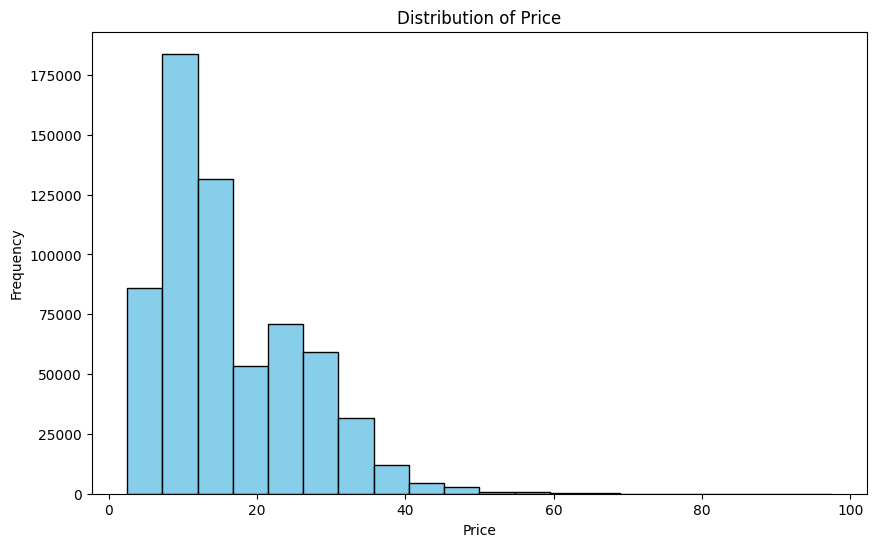

In [100]:
# Create a histogram for the 'price' column
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.hist(df_copy['price'], bins=20, color='skyblue', edgecolor='black')  # Plot the histogram with 20 bins, skyblue color, and black edges
plt.title('Distribution of Price')  # Add a title to the histogram
plt.xlabel('Price')  # Label the x-axis as 'Price'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'

Berdasarkan histogram dan perhitungan central tendency dapat dilihat bahwa rata-rata customer membayar tarif sebesar 16.5 dan tarif yang paling banyak dari seluruh transaksi adalah 7

## Distribution of Distance

In [101]:
# Calculate the mean, mode, and median of the 'distance' column
mean_distance = df_copy['distance'].mean()        # Calculate the average (mean) distance
mode_distance = df_copy['distance'].mode()[0]     # Calculate the most frequent (mode) distance
median_distance = df_copy['distance'].median()    # Calculate the middle value (median) distance

# Display the results
print("Mean distance   :", mean_distance)  # Print the mean distance
print("Mode distance   :", mode_distance)  # Print the mode distance
print("Median distance :", median_distance)  # Print the median distance

Mean distance   : 2.189261100731062
Mode distance   : 2.66
Median distance : 2.16


In [102]:
# Calculate the skewness of the 'distance' column
skewness_distance = df_copy['distance'].skew()  # Skewness indicates the asymmetry of the distribution

# Print the skewness value and interpret the result
print("Skewness Distance : ", skewness_distance)  # Print the skewness value
if skewness_distance > 0:
    print("Right skewed distribution (positive skewness)")  # Positive skewness indicates a right skew
elif skewness_distance < 0:
    print("Left skewed distribution (negative skewness)")  # Negative skewness indicates a left skew
else:
    print("Normal distribution (zero skewness)")  # Zero skewness indicates a symmetric (normal) distribution

Skewness Distance :  0.8168484903389348
Right skewed distribution (positive skewness)


Text(0, 0.5, 'Frequency')

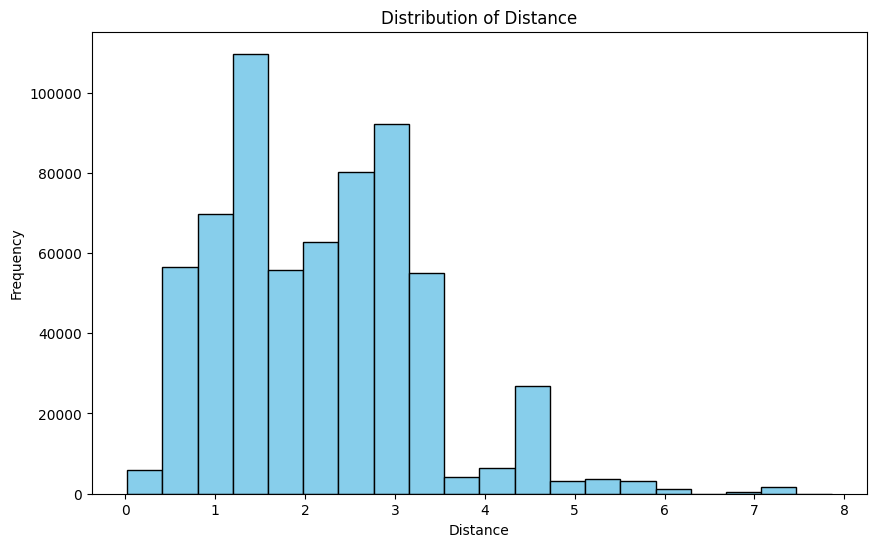

In [103]:
# Create a histogram for the 'distance' column
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.hist(df_copy['distance'], bins=20, color='skyblue', edgecolor='black')  # Plot the histogram with 20 bins, skyblue color, and black edges
plt.title('Distribution of Distance')  # Add a title to the histogram
plt.xlabel('Distance')  # Label the x-axis as 'Distance'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'

Berdasarkan histogram dan perhitungan central tendency dapat dilihat bahwa jarak rata-rata yang ditempuh oleh customer dalam menggunakan uber atau lyft adalah 2.18 sedangkan jarak yang paling sering ditempuh adalah sejauh 2.66

In [104]:
# Perform hypothesis testing for correlation
# H0: There is no correlation between price and distance
# H1: There is a correlation between price and distance

# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(df_copy['price'], df_copy['distance'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient :", corr_coef)  # Pearson correlation coefficient
print("P-value                 :", p_value)   # P-value indicating the significance of the correlation

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with alpha to determine the result of the hypothesis test
if p_value < alpha:
    print("H0 is rejected, as there is sufficient evidence to suggest a correlation between price and distance.")
else:
    print("H0 is accepted, as there is insufficient evidence to suggest a correlation between price and distance.")

Correlation Coefficient : 0.3450610662796512
P-value                 : 0.0
H0 is rejected, as there is sufficient evidence to suggest a correlation between price and distance.


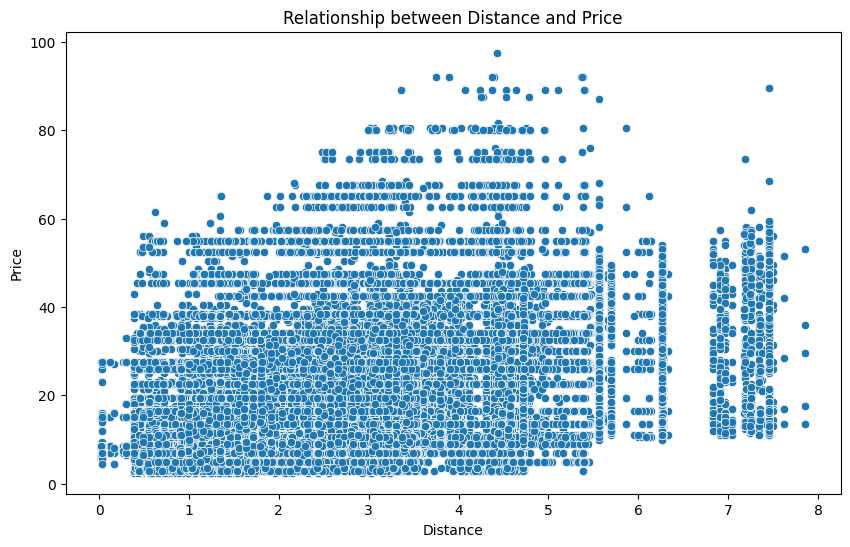

In [105]:
# Create a scatter plot to visualize the relationship between price and distance
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='distance', y='price', data=df_copy)  # Create the scatter plot using seaborn
plt.title('Relationship between Distance and Price')  # Add a title to the plot
plt.xlabel('Distance')  # Label the x-axis as 'Distance'
plt.ylabel('Price')  # Label the y-axis as 'Price'
plt.show()  # Display the plot

Diagram Scatter Plot diatas memperlihatkan lebih jelas lagi bahwa semakin jauh jarak yang ditempuh maka akan semakin besar tarif yang dikeluarkan customer untuk membayar

## Distribution of Cab Type

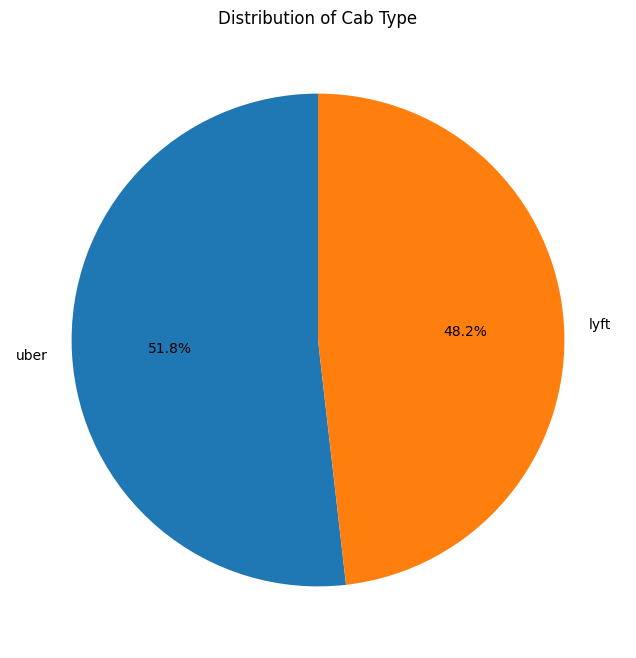

cab_type
uber    330568
lyft    307408
Name: count, dtype: int64


In [106]:
# Calculate the count of each cab_type
cab_type_counts = df_copy['cab_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(cab_type_counts, labels=cab_type_counts.index, autopct='%1.1f%%', startangle=90)  # Plot the pie chart with percentages
plt.title('Distribution of Cab Type')  # Add a title to the pie chart
plt.show()  # Display the pie chart

# Display the count of each cab_type
print(cab_type_counts)  # Print the counts for each cab type

Customer/pengguna layanan uber lebih banyak dibandingkan pesaingnya yaitu lyft

## Distribution of Rides by Hour

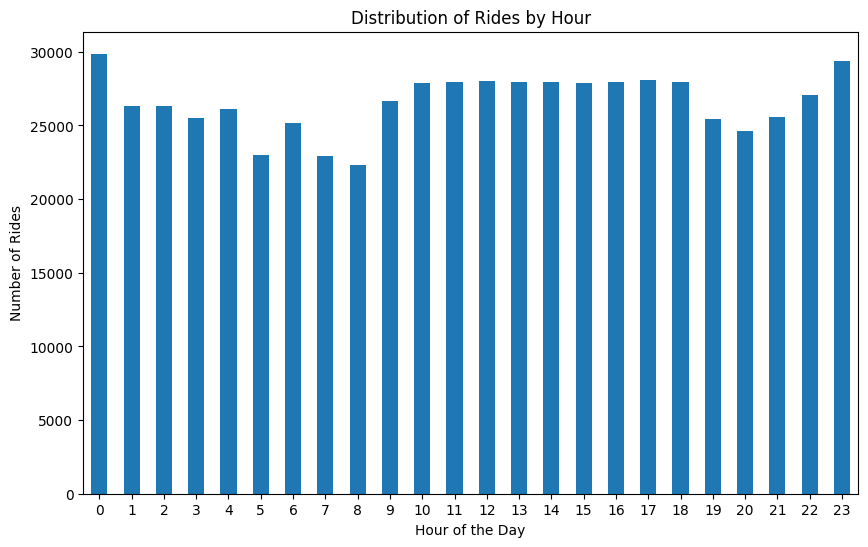

In [107]:
# Visualization for the 'hour' column, sorted by hour
plt.figure(figsize=(10, 6))  # Set the figure size
df_copy['hour'].value_counts().sort_index().plot(kind='bar')  # Plot a bar chart with counts sorted by hour
plt.title('Distribution of Rides by Hour')  # Add a title to the chart
plt.xlabel('Hour of the Day')  # Label the x-axis as 'Hour of the Day'
plt.ylabel('Number of Rides')  # Label the y-axis as 'Number of Rides'
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()  # Display the bar chart

Waktu (jam) customer pada saat memesan/menggunakan layanan uber atau lyft cenderung merata pada rentang waktu jam 10-18, sedangkan puncaknya pada tengah malam

## Distribution of Rides by Month

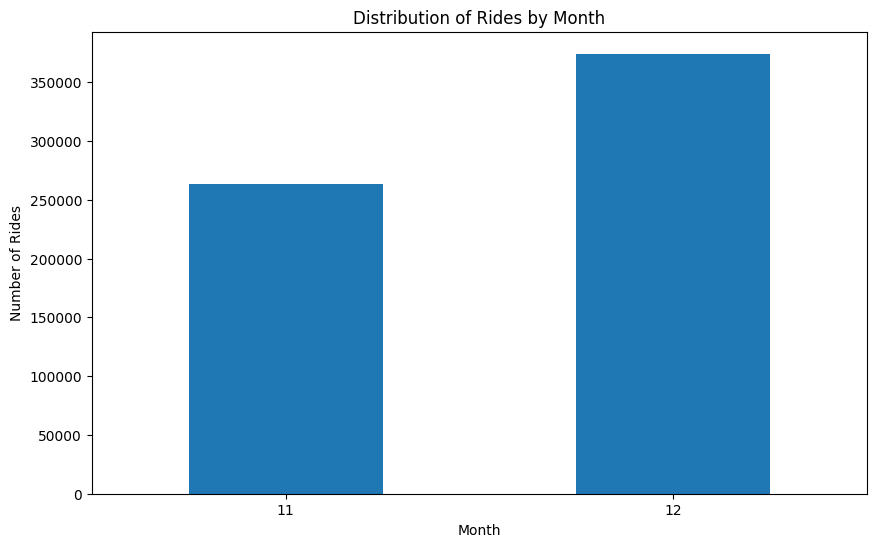

In [108]:
# Visualization for the 'month' column
plt.figure(figsize=(10, 6))  # Set the figure size
df_copy['month'].value_counts().sort_index().plot(kind='bar')  # Plot a bar chart with counts sorted by month
plt.title('Distribution of Rides by Month')  # Add a title to the chart
plt.xlabel('Month')  # Label the x-axis as 'Month'
plt.ylabel('Number of Rides')  # Label the y-axis as 'Number of Rides'
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()  # Display the bar chart

Transaksi pada dataset ada direntang waktu november hingga desember, terlihat pada bar chart transaksi paling banyak yaitu pada bulan desember

## Distribution of Rides by Car Name

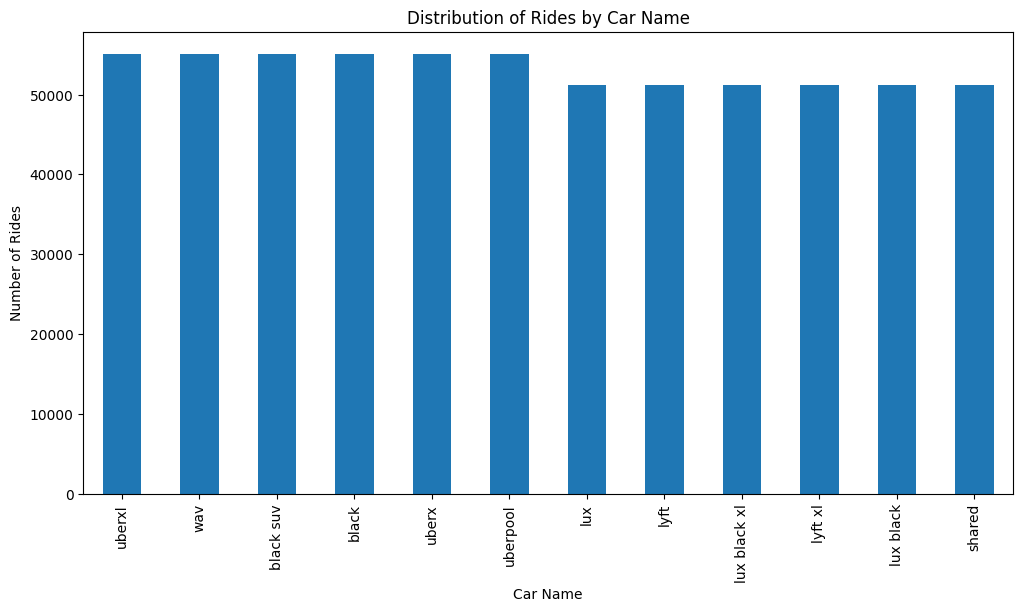

In [109]:
# Visualization for the 'name' column
plt.figure(figsize=(12, 6))  # Set the figure size
df_copy['name'].value_counts().plot(kind='bar')  # Plot a bar chart with counts for each car name
plt.title('Distribution of Rides by Car Name')  # Add a title to the chart
plt.xlabel('Car Name')  # Label the x-axis as 'Car Name'
plt.ylabel('Number of Rides')  # Label the y-axis as 'Number of Rides'
plt.xticks(rotation=90)  # Rotate the x-axis labels vertically for better readability
plt.show()  # Display the bar chart

Layanan-layanan yang ada pada uber paling sering digunakan oleh customer dibanding lyft

## Distribution of Rides by Cab Type and Day

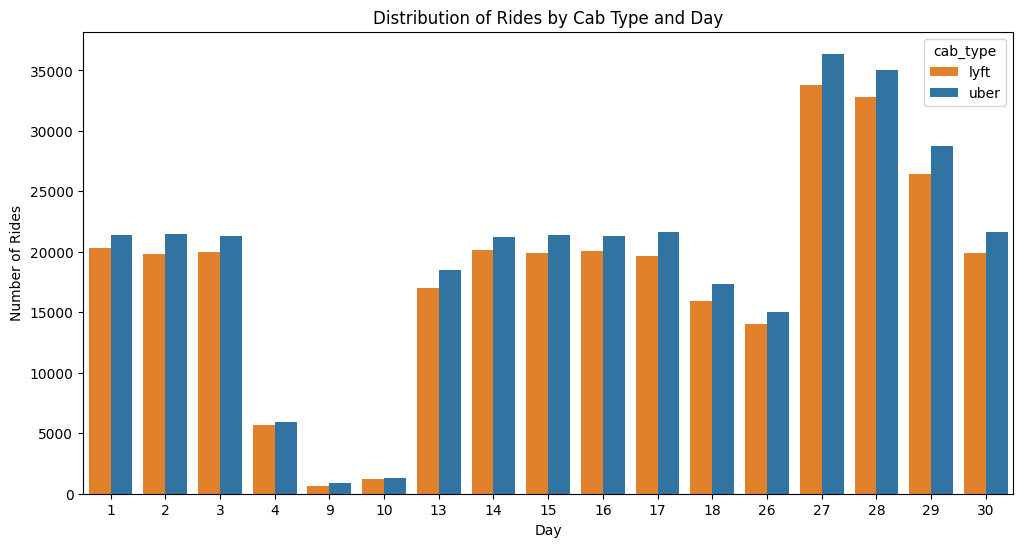

In [110]:
# Group data by 'cab_type' and 'day'
ct_day = df_copy.groupby(['cab_type', 'day']).size().reset_index(name='count')

# Create a plot with specified colors
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='day', y='count', hue='cab_type', data=ct_day, palette=['#ff7f0e', '#1f77b4'])  # Create a bar plot with custom colors for each cab type
plt.title('Distribution of Rides by Cab Type and Day')  # Add a title to the plot
plt.xlabel('Day')  # Label the x-axis as 'Day'
plt.ylabel('Number of Rides')  # Label the y-axis as 'Number of Rides'
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()  # Display the plot

Customer menggunakan layanan uber atau lyft paling banyak disekitar pertengahan bulan hingga akhir bulan

## Distribution of Rides by Cab Type and Hour

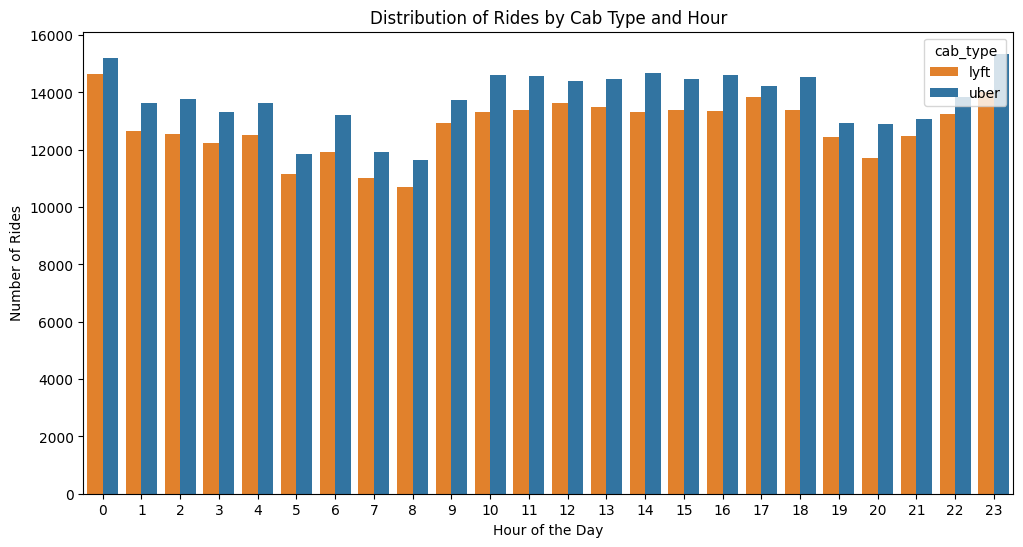

In [111]:
# Group data by 'cab_type' and 'hour'
ct_hour = df_copy.groupby(['cab_type', 'hour']).size().reset_index(name='count')

# Create a plot with specified colors
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='hour', y='count', hue='cab_type', data=ct_hour, palette=['#ff7f0e', '#1f77b4'])  # Create a bar plot with custom colors for each cab type
plt.title('Distribution of Rides by Cab Type and Hour')  # Add a title to the plot
plt.xlabel('Hour of the Day')  # Label the x-axis as 'Hour of the Day'
plt.ylabel('Number of Rides')  # Label the y-axis as 'Number of Rides'
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()  # Display the plot

Setelah sebelumnya menganalisa waktu yang paling banyak ketika customer memesan layanan, pada diagram ini visualisasi lebih rinci untuk melihat perbandingan waktu ketika customer memesan layanan antara uber dan lyft

## Mean of Price between Uber and Lyft

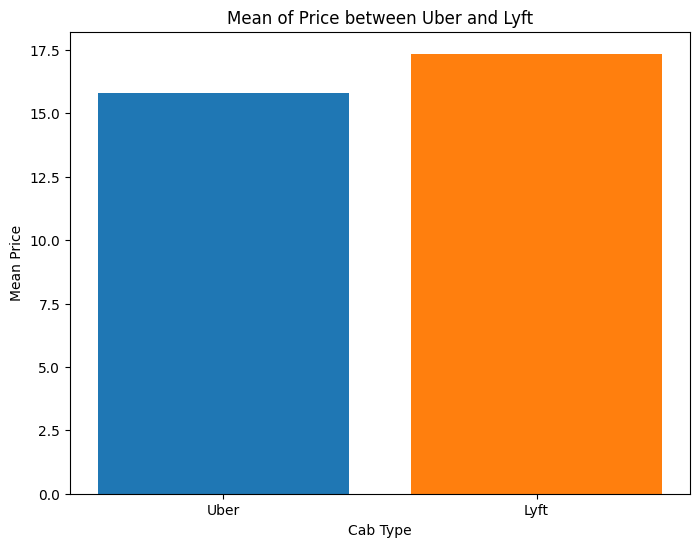

Mean Price Uber : 15.795343166912708
Mean Price Lyft : 17.351396125019512


In [112]:
# Calculate the average price for Uber and Lyft
mean_price_uber = df_copy[df_copy['cab_type'] == 'uber']['price'].mean()
mean_price_lyft = df_copy[df_copy['cab_type'] == 'lyft']['price'].mean()

# Create a bar chart with specified colors
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(['Uber', 'Lyft'], [mean_price_uber, mean_price_lyft], color=['#1f77b4', '#ff7f0e'])  # Plot a bar chart comparing mean prices
plt.title('Mean of Price between Uber and Lyft')  # Add a title to the chart
plt.xlabel('Cab Type')  # Label the x-axis as 'Cab Type'
plt.ylabel('Mean Price')  # Label the y-axis as 'Mean Price'
plt.show()  # Display the bar chart

# Print the mean prices for Uber and Lyft
print("Mean Price Uber :", mean_price_uber)
print("Mean Price Lyft :", mean_price_lyft)

Harga rata-rata lyft lebih mahal dilihat dari transaksi yang ada pada dataset

## Maximum and Minimum price

In [113]:
# Get the maximum price:
max_price = df_copy['price'].max()  # Calculate the maximum price

# Get the minimum price:
min_price = df_copy['price'].min()  # Calculate the minimum price

# Print the maximum and minimum prices:
print("Maximum Price:", max_price)  # Output the maximum price
print("Minimum Price:", min_price)  # Output the minimum price

Maximum Price: 97.5
Minimum Price: 2.5


Tarif termahal yang dibayarkan customer yaitu 97.5, sedangkan tarif termurah yaitu 2.5

In [114]:
# Filter the DataFrame to find the row(s) where the price is the maximum value
df_copy[df_copy['price'] == df_copy['price'].max()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,america/new_york,financial district,fenway,lyft,lyft_luxsuv,lux black xl,97.5,4.43,medium,42.3503,-71.081,35.52,35.52,clear,light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [115]:
# Filter the DataFrame to find the row(s) where the price is the minimum value
df_copy[df_copy['price'] == df_copy['price'].min()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
5901,f6ed86e6-c3f1-42f5-9ce9-bb4bea19f18e,1.543448e+09,23,28,11,2018-11-28 23:33:41,america/new_york,boston university,back bay,lyft,lyft_line,shared,2.5,1.53,normal,42.2148,-71.0330,39.35,33.00,overcast,mostly cloudy throughout the day.,0.0000,0.00,0.69,9.63,14.39,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,cloudy,29.86,995.30,293,1.00,0,10.000,355.0,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
7370,5c77b1f4-dbd3-4533-8ba9-ddc4af2ad740,1.545134e+09,11,18,12,2018-12-18 11:45:10,america/new_york,haymarket square,beacon hill,lyft,lyft_line,shared,2.5,1.39,normal,42.3661,-71.0631,24.71,12.26,mostly cloudy,mostly cloudy throughout the day.,0.0000,0.00,0.51,15.00,24.98,1545127200,9.901,32.81,1545159600,20.92,1545220800,22.75,1545159600,14.29,1545199200,partly-cloudy-night,9.22,1006.60,315,0.77,0,9.901,369.6,1545134997,1545167680,0.37,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
8623,9da5d7c6-cbf6-4dc9-a69f-3c57893ade01,1.543440e+09,21,28,11,2018-11-28 21:20:10,america/new_york,south station,financial district,lyft,lyft_line,shared,2.5,0.65,normal,42.3519,-71.0551,41.35,35.62,overcast,mostly cloudy throughout the day.,0.0000,0.00,0.60,9.29,11.60,1543431600,10.000,42.60,1543438800,37.33,1543489200,36.56,1543435200,31.82,1543478400,cloudy,28.39,993.87,295,1.00,0,10.000,355.2,1543405934,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
16675,1ad71e9a-d990-49be-8b77-6e94fb40f260,1.543299e+09,6,27,11,2018-11-27 06:06:21,america/new_york,fenway,back bay,lyft,lyft_line,shared,2.5,1.47,normal,42.2148,-71.0330,43.03,36.79,light rain,light rain in the morning.,0.0674,1.00,0.93,11.62,12.67,1543334400,2.642,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,rain,41.15,996.34,65,1.00,0,2.642,286.9,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
17032,93192aa7-f773-4127-9a02-ab52d061d26a,1.543459e+09,2,29,11,2018-11-29 02:29:08,america/new_york,north end,north station,lyft,lyft_line,shared,2.5,0.98,normal,42.3429,-71.1003,37.92,31.91,mostly cloudy,mostly cloudy throughout the day.,0.0000,0.00,0.71,8.28,12.43,1543431600,9.981,42.70,1543438800,37.17,1543464000,36.77,1543438800,31.87,1543460400,partly-cloudy-night,29.42,997.37,305,0.75,0,9.981,348.9,1543405943,1543439731,0.72,0.0000,1543420800,33.60,1543399200,42.70,1543438800,30.08,1543399200,36.77,1543438800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677015,7ed35758-7e46-4602-a0fe-d46276142fab,1.545115e+09,6,18,12,2018-12-18 06:40:13,america/new_york,haymarket square,financial district,lyft,lyft_line,shared,2.5,0.99,normal,42.3503,-71.0810,33.71,25.35,overcast,mostly cloudy throughout the day.,0.0017,0.11,0.65,11.05,20.20,1545127200,5.860,32.75,1545159600,20.66,1545220800,22.75,1545159600,14.53,1545199200,cloudy,23.09,1001.28,314,1.00,0,5.860,362.1,1545134998,1545167687,0.37,0.0028,1

# Feature Engineering

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

*Setelah dilakukan analisa, kolom yang memiliki pengaruh terhadap `price` yaitu `product`, `weather`, `hour`, `day`, `distance`, `cab_type`, `surge_multiplier`*

### Split Feature

In [116]:
# Define the feature matrix X and the target vector y
X = df_copy[['name', 'short_summary', 'hour', 'day', 'distance', 'cab_type', 'surge_multiplier']]  # Features (independent variables)
y = df_copy['price']  # Target variable (dependent variable)

### Split Train Set and Test

In [117]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# test_size=0.25 specifies that 25% of the data will be used for testing, and the rest for training
# random_state=1 ensures reproducibility of the split

# Print the size of the training and testing sets
print('Train Size', X_train.shape)  # Print the number of rows and columns in the training set
print('Test Size', X_test.shape)    # Print the number of rows and columns in the testing set

# Display the first few rows of the training feature matrix
X_train.head()

Train Size (478482, 7)
Test Size (159494, 7)


,name,short_summary,hour,day,distance,cab_type,surge_multiplier
425908,lyft,mostly cloudy,10,18,2.84,lyft,normal
578626,black,overcast,19,28,2.27,uber,normal
256151,wav,partly cloudy,23,1,2.62,uber,normal
660495,black,mostly cloudy,1,29,0.49,uber,normal
285269,uberx,overcast,19,17,0.92,uber,normal


### Outlier Handling

sebelum dilakukan handling pada outlier, dilakukan pengecekan skewness pada kolom `distance`

In [118]:
# Calculate the skewness of the 'distance' column in the training set
skewness_distance = X_train['distance'].skew()

# Print the skewness value and its interpretation
print("Skewness Distance X_train : ", skewness_distance)  # Print the skewness of the distance feature in the training set

# Interpret the skewness value
if skewness_distance > 0:
    print("Right skewed distribution (positive skewness)")  # Positive skewness indicates a right skew
elif skewness_distance < 0:
    print("Left skewed distribution (negative skewness)")  # Negative skewness indicates a left skew
else:
    print("Normal distribution (zero skewness)")  # Zero skewness indicates a symmetric (normal) distribution

Skewness Distance X_train :  0.8132614673048966
Right skewed distribution (positive skewness)


In [119]:
def find_skewed_boundaries(df_copy, variable, distance):
    """
    Calculate the upper and lower boundaries for identifying outliers based on skewness.

    Parameters:
    df_copy (DataFrame): The DataFrame containing the data.
    variable (str): The column name for which boundaries are to be calculated.
    distance (float): The distance multiplier for calculating the boundaries.

    Returns:
    tuple: (upper_boundary, lower_boundary) - The upper and lower boundaries for the given variable.
    """
    # Calculate the Interquartile Range (IQR)
    IQR = df_copy[variable].quantile(0.75) - df_copy[variable].quantile(0.25)

    # Calculate the lower boundary for outliers
    lower_boundary = df_copy[variable].quantile(0.25) - (IQR * distance)
    # Calculate the upper boundary for outliers
    upper_boundary = df_copy[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [120]:
# Calculate the upper and lower boundaries for outliers in the 'distance' column of X_train
upper_boundary_distance, lower_boundary_distance = find_skewed_boundaries(X_train, 'distance', 3)

# Print the calculated upper and lower boundaries
upper_boundary_distance, lower_boundary_distance

(7.91, -3.7100000000000004)

jarak maksimum yang terdapat pada dataset yaitu 7.9, sedangkan jarak minimumnya -3.71 (jarak tidak mungkin negatif, oleh karena itu akan dilakukan trimming)

In [121]:
# Print the total number of trips in the training set
print('Total Distance                           : {}'.format(len(X_train)))

# Print the number of passengers who have a trip distance greater than the upper boundary
print('Passengers who has trip more than 7.9    : {}'.format(len(X_train[X_train['distance'] > upper_boundary_distance])))

print('')  # Print an empty line for readability

# Calculate and print the percentage of passengers who have a trip distance greater than the upper boundary
print('% passengers who has trip more than 7.9  : {}'.format(len(X_train[X_train['distance'] > upper_boundary_distance]) / len(X_train) * 100))

Total Distance                           : 478482
Passengers who has trip more than 7.9    : 0

% passengers who has trip more than 7.9  : 0.0


In [122]:
# Flag outliers in the 'distance' column based on calculated boundaries
outliers_distance = np.where(X_train['distance'] > upper_boundary_distance, True,
                       np.where(X_train['distance'] < lower_boundary_distance, True, False))
# np.where creates an array of boolean values: True for outliers (distance above upper boundary or below lower boundary), False otherwise

# Remove the outliers from the dataset
X_train_trimmed = X_train.loc[~(outliers_distance)]
# ~ (tilde) operator inverts the boolean array, so ~outliers_distance selects rows where outliers_distance is False (i.e., non-outliers)

# Print the size of the dataset before and after trimming
print('Size dataset - Before trimming : ', X_train.shape)  # Size of the original dataset
print('Size dataset - After trimming  : ', X_train_trimmed.shape)  # Size of the dataset after removing outliers

Size dataset - Before trimming :  (478482, 7)
Size dataset - After trimming  :  (478482, 7)


### Split Numerical Column and Categorical Column

In [123]:
# Numerical columns:
num_col = ['distance']

# List of numerical columns treated as nominal, which is unusual for continuous data.
num_col_nominal = ['distance']

# Categorical columns:
# - cat_col: Grouping of categorical columns
cat_col = [['name', 'short_summary', 'hour', 'day', 'cab_type', 'surge_multiplier']]

# List of categorical columns where values are discrete with no intrinsic order.
cat_col_nominal = ['name', 'short_summary', 'hour', 'day', 'cab_type']

# List of categorical columns with a meaningful order. 'surge_multiplier' is considered ordinal, which means it has an ordered relationship between categories.
cat_col_ordinal = ['surge_multiplier']

In [124]:
# Split between numerical and categorical columns in the training set
X_train_num_nominal = X_train[num_col_nominal]  # Extract numerical columns treated as nominal from the training set
X_train_cat = X_train[cat_col[0]]  # Extract nominal categorical columns from the training set. Access the first element of cat_col, which contains the list of column names.
X_train_cat_nominal = X_train[cat_col_nominal]  # Extract nominal categorical columns from the training set
X_train_cat_ordinal = X_train[cat_col_ordinal]  # Extract ordinal categorical columns from the training set

# Split between numerical and categorical columns in the test set
X_test_num_nominal = X_test[num_col_nominal]  # Extract numerical columns treated as nominal from the test set
X_test_cat = X_test[cat_col[0]]  # Extract nominal categorical columns from the test set. Access the first element of cat_col, which contains the list of column names.
X_test_cat_nominal = X_test[cat_col_nominal]  # Extract nominal categorical columns from the test set
X_test_cat_ordinal = X_test[cat_col_ordinal]  # Extract ordinal categorical columns from the test set

# Feature Scaling

In [125]:
# Display a statistical summary of the numerical columns treated as nominal in the training set
X_train_num_nominal.describe()

,distance
count,478482.000000
mean,2.187505
std,1.134812
min,0.020000
25%,1.270000
50%,2.160000
75%,2.930000
max,7.860000


## Scalling Skewness Data

In [126]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train_num_nominal)

MinMaxScaler()

In [127]:
# Scale the numerical columns treated as nominal in the training set
X_train_num_nominal_scaled = scaler.fit_transform(X_train_num_nominal)

# Scale the numerical columns treated as nominal in the test set
X_test_num_nominal_scaled = scaler.transform(X_test_num_nominal)

In [128]:
# Display the scaled values of the first row of the training data
X_train_num_nominal_scaled[0]

array([0.35969388])

# Feature Encoding

## Ordinal Encoding

In [129]:
# Display the unique values in the 'surge_multiplier' column from the categorical ordinal data in the training set
print(X_train_cat_ordinal['surge_multiplier'].unique())

['normal' 'low' 'medium' 'high']


In [130]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the ordinal categorical data in the training set
encoder.fit(X_train_cat_ordinal)


OrdinalEncoder()

In [131]:
# Transform the ordinal categorical data in the training set using the fitted encoder
X_train_cat_ordinal_encoded = encoder.transform(X_train_cat_ordinal)

# Transform the ordinal categorical data in the test set using the same fitted encoder
X_test_cat_ordinal_encoded = encoder.transform(X_test_cat_ordinal)

In [132]:
# Display the encoded values of the first row of the training data
X_train_cat_ordinal_encoded[0]

array([3.])

## Nominal Encoding

In [133]:
# Print the number of unique categories for each categorical variable
print('Number of categories in the variable cab_type      : {}'.format(len(df.cab_type.unique())))
print('Number of categories in the variable short_summary : {}'.format(len(df.short_summary.unique())))
print('Number of categories in the variable name          : {}'.format(len(df['name'].unique())))
print('Number of categories in the variable hour          : {}'.format(len(df.hour.unique())))
print('Number of categories in the variable day           : {}'.format(len(df.day.unique())))

# Print the total number of passengers in the dataset
print('Total number of passengers in the dataset.         : {}'.format(len(df)))

Number of categories in the variable cab_type      : 2
Number of categories in the variable short_summary : 9
Number of categories in the variable name          : 13
Number of categories in the variable hour          : 24
Number of categories in the variable day           : 17
Total number of passengers in the dataset.         : 693071


In [134]:
# Display the first few rows of the categorical nominal data in the training set
X_train_cat_nominal.head()

,name,short_summary,hour,day,cab_type
425908,lyft,mostly cloudy,10,18,lyft
578626,black,overcast,19,28,uber
256151,wav,partly cloudy,23,1,uber
660495,black,mostly cloudy,1,29,uber
285269,uberx,overcast,19,17,uber


In [135]:
# Initialize the OneHotEncoder with the option to ignore unknown categories
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical nominal data in the training set
ohe.fit(X_train_cat_nominal)


OneHotEncoder(handle_unknown='ignore')

In [136]:
# Initialize the OneHotEncoder with the option to ignore unknown categories
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder and transform the categorical nominal training data, then convert to an array
X_train_cat_encoded_nominal = ohe.fit_transform(X_train_cat_nominal).toarray()

# Transform the categorical nominal test data using the same encoder, then convert to an array
X_test_cat_encoded_nominal = ohe.transform(X_test_cat_nominal).toarray()


In [137]:
# Display the one-hot encoded values of the first row of the training data
X_train_cat_encoded_nominal[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

## Data Concatenate (Data Merge)

In [138]:
# Combine scaled numerical data, ordinal encoded data, and one-hot encoded categorical data for training set
X_train_final = np.concatenate((X_train_num_nominal_scaled, X_train_cat_ordinal_encoded, X_train_cat_encoded_nominal), axis=1)

# Combine scaled numerical data, ordinal encoded data, and one-hot encoded categorical data for test set
X_test_final = np.concatenate((X_test_num_nominal_scaled, X_test_cat_ordinal_encoded, X_test_cat_encoded_nominal), axis=1)

In [139]:
# Display the combined feature vector for the first row of the training data
X_train_final[0]

array([0.35969388, 3.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

# Model Definition

Bagian ini berisi cell untuk mendefinisikan model.

### Linear Regression

In [140]:
# Initialize the Linear Regression model
model_linreg = LinearRegression()

### ElasticNet Regression

 ### Training using ElasticNet Regression - with alpha=0.01 and l1_ratio=0.2

In [141]:
# Initialize the ElasticNet model with specified hyperparameters
model_elasticnet_v1 = ElasticNet(alpha=0.01, l1_ratio=0.2)

### Training using Ridge Regression - with alpha=0.01 and l1_ratio=0.8

In [142]:
# Initialize the ElasticNet model with specified hyperparameters
model_elasticnet_v2 = ElasticNet(alpha=0.01, l1_ratio=0.8)

# Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

### Linear Regression

In [143]:
# Train the Linear Regression model using the training data
model_linreg.fit(X_train_final, y_train)

LinearRegression()

### ElasticNet Regression

ElasticNet with alpha=0.01 & l1_ratio=0.2:

In [144]:
# Training using ElasticNet Regression - with alpha=0.01 and l1_ratio=0.2
model_elasticnet_v1.fit(X_train_final, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.2)

ElasticNet with alpha=0.01 & l1_ratio=0.8:

In [145]:
# Training using Ridge Regression - with alpha=0.01 and l1_ratio=0.8
model_elasticnet_v2.fit(X_train_final, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.8)

# Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

### Linear regression

In [146]:
# Create a function to calculate the evaluation results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

eval_results = {
    'name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

def model_evaluation(name, model, X_train, X_test, y_train, y_test):
  # Predict Train-Set and Test-Set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Model evaluation using different metrics
  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)

  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

  r2score_train = r2_score(y_train, y_pred_train)
  r2score_test = r2_score(y_test, y_pred_test)

  # Save into dictionary
  eval_results['name'].append(name)
  eval_results['MAE - Train'].append(round(mae_train, 5))
  eval_results['MAE - Test'].append(round(mae_test, 5))
  eval_results['MSE - Train'].append(round(mse_train, 5))
  eval_results['MSE - Test'].append(round(mse_test, 5))
  eval_results['RMSE - Train'].append(round(rmse_train, 5))
  eval_results['RMSE - Test'].append(round(rmse_test, 5))
  eval_results['R2 Score - Train'].append(round(r2score_train, 5))
  eval_results['R2 Score - Test'].append(round(r2score_test, 5))

In [147]:
# Evaluate the model
model_evaluation('Linear Regression', model_linreg, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression
MAE - Train,1.83878
MAE - Test,1.83229
MSE - Train,7.52051
MSE - Test,7.39405
RMSE - Train,2.74235
RMSE - Test,2.71920
R2 Score - Train,0.91365
R2 Score - Test,0.91452


### ElasticNet Regression

ElasticNet with alpha=0.01 & l1_ratio=0.2:

In [148]:
# Evaluate the model
model_evaluation('ElasticNet with alpha=0.01 & l1_ratio=0.2', model_elasticnet_v1, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,ElasticNet with alpha=0.01 & l1_ratio=0.2
MAE - Train,1.83878,1.92173
MAE - Test,1.83229,1.91512
MSE - Train,7.52051,8.84765
MSE - Test,7.39405,8.71364
RMSE - Train,2.74235,2.97450
RMSE - Test,2.71920,2.95189
R2 Score - Train,0.91365,0.89841
R2 Score - Test,0.91452,0.89927


ElasticNet with alpha=0.01 & l1_ratio=0.8:

In [149]:
# Evaluate the model
model_evaluation('ElasticNet with alpha=0.01 & l1_ratio=0.8', model_elasticnet_v2, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,Linear Regression,ElasticNet with alpha=0.01 & l1_ratio=0.2,ElasticNet with alpha=0.01 & l1_ratio=0.8
MAE - Train,1.83878,1.92173,1.81569
MAE - Test,1.83229,1.91512,1.80948
MSE - Train,7.52051,8.84765,7.70319
MSE - Test,7.39405,8.71364,7.57552
RMSE - Train,2.74235,2.97450,2.77546
RMSE - Test,2.71920,2.95189,2.75237
R2 Score - Train,0.91365,0.89841,0.91155
R2 Score - Test,0.91452,0.89927,0.91243


# Model Saving

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [150]:
# with open('model_lin.pkl', 'wb') as file_1: # this is the file name
#     pickle.dump(model_elasticnet_v2, file_1) # this is the model name

# with open('model_scaler.pkl', 'wb') as file_2: # this is the file name
#     pickle.dump(scaler, file_2) # this is the scaler name

# with open('model_encoder_ordinal.pkl', 'wb') as file_3: # this is the file name
#     pickle.dump(encoder, file_3) # this is the encoder name

# with open('model_encoder_nominal.pkl', 'wb') as file_4: # this is the file name
#     pickle.dump(ohe, file_4) # this is the encoder name

# with open('list_num_col.txt', 'wb') as file_5: # this is the file name
#     pickle.dump(num_col, file_5) # this is the numerical column name

# with open('list_cat_col.txt', 'wb') as file_6: # this is the file name
#     pickle.dump(cat_col, file_6) # this is the categorical column name

# with open('list_cat_col_nominal.txt', 'wb') as file_7: # this is the file name
#     pickle.dump(cat_col_nominal, file_7) # this is the categorical column name

# with open('list_cat_col_ordinal.txt', 'wb') as file_8: # this is the file name
#     pickle.dump(cat_col_ordinal, file_8) # this is the categorical column name

# Model Inference

***`Model inference dibuat pada notebook (.ipynb) terpisah`***

# Model Analysis

Hasil analisa pada model evaluation menunjukan bahwa Linear Regression merupakan model yang paling baik (R2 Score paling tinggi)

- **MAE Test:** ElasticNet dengan alpha=0.01 & l1_ratio=0.8 memiliki MAE test terendah yaitu 1.80948.
- **MSE Test:** ElasticNet dengan alpha=0.01 & l1_ratio=0.8 memiliki MSE test terendah yaitu 7.57552.
- **RMSE Test:** ElasticNet dengan alpha=0.01 & l1_ratio=0.8 memiliki RMSE test terendah yaitu 2.75237.
- **R2 Score Test:** ElasticNet dengan alpha=0.01 & l1_ratio=0.8 juga memiliki R2 Score test tertinggi yaitu 0.91243.

Dari hasil ini, **ElasticNet dengan alpha=0.01 dan l1_ratio=0.8** tampaknya merupakan model yang paling baik karena memiliki nilai MAE, MSE, dan RMSE yang terendah pada data uji, serta memiliki R2 Score yang paling mendekati 1 dibandingkan dengan model lainnya.

# Conclusion

Berdasarkan hasil evaluasi, ElasticNet dengan alpha=0.01 dan l1_ratio=0.8 tampaknya merupakan model yang paling tepat untuk memprediksi harga perjalanan. Model ini menunjukkan nilai R² tertinggi pada data uji, yang menunjukkan kemampuannya yang kuat dalam menjelaskan variabilitas pada variabel target. Hal ini mengindikasikan bahwa  ElasticNet dengan alpha=0.01 dan l1_ratio=0.8 secara efektif menangkap hubungan antara fitur-fitur yang ada dengan harga.

Namun, perlu dicatat bahwa pemilihan model terbaik dapat bergantung pada tujuan dan prioritas bisnis tertentu. Misalnya, jika meminimalkan kesalahan prediksi merupakan hal yang sangat penting, maka model dengan nilai MAE atau RMSE yang lebih rendah mungkin lebih diutamakan.

Analisis lebih lanjut dapat mencakup:
- Mengeksplorasi berbagai teknik rekayasa fitur untuk meningkatkan kinerja model.
- Melakukan tuning hyperparameter pada ElasticNet untuk meningkatkan performanya.
- Menyelidiki dampak outlier dan ketidakseimbangan data terhadap prediksi model.
- Mengevaluasi kinerja model pada data yang belum pernah dilihat untuk memastikan kemampuan generalisasi model.
- Mempertimbangkan model regresi lain seperti Random Forest atau Gradient Boosting untuk kemungkinan peningkatan.

Secara keseluruhan, project ini menunjukkan pendekatan yang komprehensif dalam membangun model prediktif untuk harga perjalanan. Dengan menggabungkan pra-pemrosesan data, rekayasa fitur, pemilihan model, dan evaluasi, project ini memberikan dasar yang kuat untuk pengembangan dan optimalisasi lebih lanjut.

# Conceptual Problem

In [151]:
print('ElasticNet Regression - alpha=0.01 & l1_ratio=0.8')
print('Coefficients : ', model_elasticnet_v2.coef_)
print('Intercept    : ', model_elasticnet_v2.intercept_)
print('')

ElasticNet Regression - alpha=0.01 & l1_ratio=0.8
Coefficients :  [19.73619505 -3.91803231  4.60379749 14.1660495   0.93290104  6.09946071
 15.13748644 -6.8354585  -1.2781978  -9.7408764  -6.70502565 -5.72670153
 -0.         -5.71298176 -0.          0.         -0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.30313223 -0.1065317 ]
Intercept    :  22.106003017323335



Hasil model **ElasticNet Regression** yang ditunjukkan pada hasil analisa:

1. **Koefisien**:
   - Nilai-nilai ini menunjukkan pengaruh masing-masing fitur terhadap variabel target.
   - Contoh:
     - Koefisien 19.736 berarti peningkatan satu satuan pada fitur terkait akan menaikkan variabel target sebesar 19.736.
     - Koefisien negatif seperti -3.918 berarti peningkatan satu satuan pada fitur tersebut akan menurunkan variabel target sebesar 3.918.
     - Koefisien yang mendekati atau bernilai nol menunjukkan bahwa fitur tersebut tidak memiliki pengaruh signifikan pada model.

2. **Intercept**:
   - Nilai **22.106** berarti jika semua fitur bernilai nol, variabel target diprediksi bernilai 22.106.
   - Ini adalah titik awal sebelum mempertimbangkan pengaruh fitur-fitur lainnya.

ElasticNet memanfaatkan regularisasi, sehingga beberapa koefisien diatur menjadi nol, menandakan fitur-fitur yang tidak penting.